# Chladni Patterns

https://en.wikipedia.org/wiki/Ernst_Chladni

Katex Reference: https://utensil-site.github.io/available-in-katex/

* Figures are formed from outlining nodal points (zero displacement for all t) on 2D Standing waves
* Mathematical Model - 2D rectangular membrane of fixed boundary and constant density
* 1816 - Sophie Germaine found a mathematical explanation of these figures

In [12]:
import cv2 as cv
from IPython.display import Image 
import numpy as np
from matplotlib import pyplot as plt

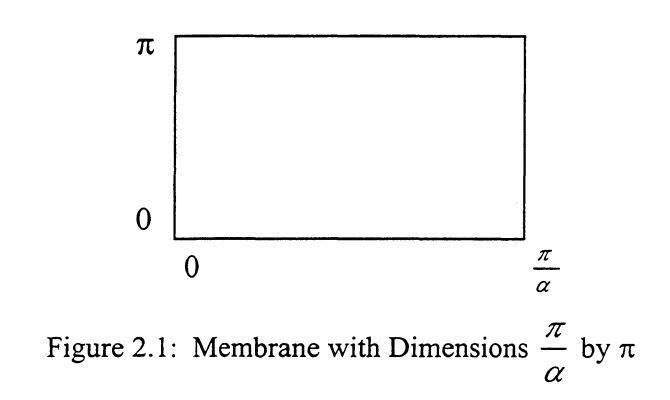

In [2]:
fig1 = Image(filename = 'rectangular_membrane_figure.png')
display(fig1)

## <span style="color:orange">diagram should read 'a' instead of alpha ^</span>.

In [3]:
membrane_height = np.pi
alpha = 1  # ratio of membrane height to width
membrane_width = membrane_height / alpha

## Assumptions
* Membrane has no initial velocity
* Membrane has initial displacement
* vertical displacement of the membrane at any position x,y and time t is define by function u
$$
u(x, y, t)
$$

## 2D Wave Equation:
* Reference: https://en.wikipedia.org/wiki/Wave_equation
$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = \frac{1}{v^2} \frac{\partial^2 u}{\partial t^2}
$$
Or
$$
\ddot u = v^2 \nabla^2 u
$$


* v is velocity of the wave.  v is set to 1 for simplicity
$$
u(x, y, 0) = f(x, y) = 0
$$
* initial displacement at t = 0, set to 0 for simplicity

<hr/>

 ## Boundary Conditions:


* Perimeter is fixed on all sides


$$ [B1] \hskip1em u(0, y, t) = 0 $$

$$ [B2] \hskip1em u(0, \frac{\pi}{a}, t) = 0 $$
    

$$ [B3] \hskip1em u(x, 0, t) = 0 $$
    

$$ [B4] \hskip1em u(x, \pi, t) = 0 $$

<hr/>

## Separation of Variables Form:

reference: https://en.wikipedia.org/wiki/Separation_of_variables#:~:text=In%20mathematics%2C%20separation%20of%20variables,different%20side%20of%20the%20equation.

$$
    u(x, y, t) = X(x)Y(y)T(t)
$$
    



$$
Y(y)T(t)X''(x) + X(x)T(t)Y''(y) = X(x)Y(t)T''(t)
$$

$$
\frac{X''(x)}{X(x)} = \frac{T''(t)}{T(t)} - \frac{Y''(y)}{Y(y)} 
$$

* Since the left hand side is a function solely of x, while the right hand side is a
function only of y and t and since the equation must be true for all x, y and t, each side
must be equal to the same constant. 

$$
\frac{X''}{X} = -\alpha \\
$$

$$
\frac{T''}{T} - \frac{Y''}{Y}= -\alpha \\
$$

$$
\frac{Y''}{Y} = -\beta
$$

$$
\frac{T''}{T} = -\alpha - \beta
$$

<hr/>

# ODE Solutions

<hr/>

## X-Dimension

$$
X(x) = c_1 \sin(\sqrt\alpha x) + c_2 \cos(\sqrt\alpha x)
$$

#### Boundary Condition [B1]:

$$
X(0) = 0 \\
c_2 = 0
$$

#### Boundary Condition [B2]:

$$
X(\frac{\pi}{a}) = c_1 \sin(\sqrt\alpha \frac{\pi}{a}) = 0 \\
$$

$$\sqrt\alpha \frac{\pi}{a} = n \pi, \hskip1em n \epsilon \Zeta\\$$

$$
\alpha = a^2n^2, \hskip1em n \epsilon \Zeta\\
$$

* note alpha refers to a constant from separation of variables and a is a length

$$
X(x) = c_1 sin(anx), \hskip1em n \epsilon \Zeta
$$

<hr/>

## Y-Dimension

$$
Y(y) = d_1 sin(\sqrt\beta y) + d_2 cos(\sqrt\beta y)
$$

#### Boundary Condition [B3]:

$$
Y(0) = 0
$$

* So d2 must be 0

$$
Y(y) = d_1 \sin(\sqrt \beta y)
$$


#### Boundary Condition [B4]:



$$
Y(\pi) = d_1 \sin(\sqrt \beta \pi) = 0
$$

$$\sqrt \beta \pi = m \pi, \hskip1em m \epsilon \Zeta \\$$

$$
\beta = m^2, \hskip1em m \epsilon \Zeta \\
$$

$$
Y(y) = d_1 \sin(my), \hskip1em m \epsilon \Zeta
$$


<hr/>

## Time Dimension

$$
T(t) = a_1 \sin(\sqrt{a^2n^2 + m^2}t) + a_2 \cos(\sqrt{a^2n^2 + m^2}t)
$$

#### By boundary condition initial velocity = 0
## <span style="color:orange">Logic Here needs a double check ^</span>.

$$
T'(t) = \sqrt{a^2n^2 + m^2} a_1 \cos(\sqrt{a^2n^2 + m^2}t) - \sqrt{a^2n^2 + m^2} a_2 \sin(\sqrt{a^2n^2 + m^2}t)
$$

$$
0 = \sqrt{a^2n^2 + m^2} a_1

$$
a_1 = 0
$$

$$
T(t) = a_2 \cos(\sqrt{a^2n^2 + m^2}t)
$$

<hr/>

## General Solution
$$
u(x, y, t) = c_1 \sin(anx) d_1 \sin(m y) a_2 \cos(\sqrt{a^2n^2 + m^2}t), \hskip1em n, m \epsilon \Zeta
$$


$$
u(x, y, t) = \sum_{n=1}^{\infty} \sum_{m=1}^{\infty} b_{nm} \sin(anx)\sin(m y)\cos(\sqrt{a^2n^2 + m^2}t)
$$

#### <span style="color:orange">Figure out formula for fourier coefficients.  Why is the vertical displacement of the 2D wave equal to the summation of all possible integer values?^</span>.

### Fourier Coefficients

$$
b_{nm} = \frac {4a}{\pi^2} \int \limits_{0}^{\pi} \int \limits_{0}^{\frac{\pi}{n}}f(x, y)\sin(anx)\sin(my)dxdy
$$
* It can be assumed that f(x,y) is continuous since this fits with the physical situation.  

* In general, an infinite sum of periodic functions is not periodic, unless the frequencies of the sinusoidal components are rational multiples of eachother.


* The cosine component of the displacement function u(x,y,t) has an angular frequency of 
$$
\sqrt{a^2n^2 + m^2t}\\
$$
* In general, this frequency is irrational with respect to n and m
* only certain initial displacements f(x,y) will lead to solutions which are periodic!


<hr/>

## Example of an initial displacement which leads to periodic behavior

$$
f(x,y) = \sin(ax)\sin(y)
$$
* This initial displacement function gives rise to fourier coefficients of:

$$
b_{nm} = 4 {\frac{1}{4}, \hskip1em if \hskip1em n = m = 1 \brace 0, \hskip1em if \hskip1em n  \ne m \ne 1}
$$

$$
b_{11} = 1 \\
else: b_{nm} = 0
$$

* This leads to a wave 2D wave equation of:
$$
u(x, y, t) = \sin(ax)\sin(y)\cos(\sqrt{a^2 + 1}t)
$$
* This is periodic with:
$$
A = \sin(ax)\sin(y) \\
\omega_{11} = \sqrt{a^2 + 1}t
$$

* nodal lines occur where the displacement is 0 or A = 0:
$$
\sin(ax) = 0\\
\sin(y) = 0
$$


$$
ax = c\pi \\
x = \frac {c}{a}\pi
$$

$$
y = d\pi
$$

$$
where \hskip1em c, d \epsilon \Zeta
$$

The 2D Membrane has dimensionality x <= pi/a and y <= pi, so c = 1 or 0 and d = 1 or 0. These nodal lines are the perimeter boundaries of the membrane!

### Solving for Nodes

In [34]:
# TBD finding a way to mathematically compute the (x, y) coordinates which are nodes.  
# As of now, the 1st order node is simple to understand (it is just perimeter)
# So, it was easy to hard code.

<hr>

# Drawing Nodes

<hr>

## Draw Membrane without nodes

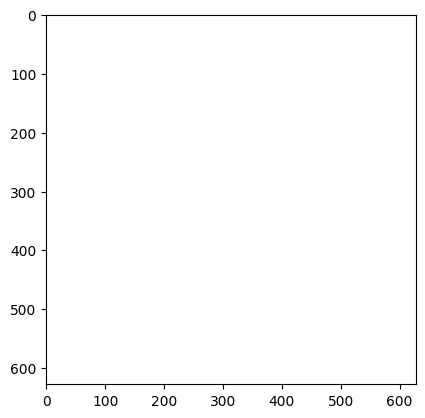

In [4]:
IMG_SCALE = 200
pix_width = int(membrane_width * IMG_SCALE)
pix_height = int(membrane_height * IMG_SCALE)
granularity = 1

x = np.arange(0, pix_width, granularity)
y = np.arange(0, pix_height, granularity)
XY = np.zeros((pix_width, pix_height), dtype=int)

xv, yv = np.meshgrid(x, y, indexing='xy')


for i in range(pix_width):
    for j in range(pix_height):
        px = xv[j,i]
        py = yv[j,i]
        XY[px][py] = 255


image = np.dstack((XY, XY, XY))
plt.imshow(image)


<hr>

## First Try at Node Calculation and Visualization | Oct 19, 2023

In [5]:
def node_calculator(pix_width, pix_height, TOLERANCE):

    granularity = 1

    X_1_LOW = 0
    X_1_HIGH = X_1_LOW + TOLERANCE

    X_2_HIGH = pix_width
    X_2_LOW = X_2_HIGH - TOLERANCE

    Y_1_LOW = 0
    Y_1_HIGH = Y_1_LOW + TOLERANCE

    Y_2_HIGH = pix_height
    Y_2_LOW = Y_2_HIGH - TOLERANCE
    
    X_NODE1 = np.arange(X_1_LOW, X_1_HIGH, granularity)
    Y_NODE1 = np.arange(Y_1_LOW, Y_1_HIGH, granularity)
    X_NODE2 = np.arange(X_2_LOW, X_2_HIGH, granularity)
    Y_NODE2 = np.arange(Y_2_LOW, Y_2_HIGH, granularity)


    node_list = []
    for i in range(pix_width):
        for j in range(pix_height):

            if i < pix_width and (j in Y_NODE1 or j in Y_NODE2):
                node_list.append([i, j])

            elif j < pix_height and (i in X_NODE1 or i in X_NODE2):
                node_list.append([i, j])
    
    return node_list

In [6]:
len(node_calculator(pix_width, pix_height, TOLERANCE=20))

48640

In [7]:
# in this case nodal boundaries fall onto the membrane width and height markings

IMG_SCALE = 200
pix_width = int(membrane_width * IMG_SCALE)
pix_height = int(membrane_height * IMG_SCALE)
granularity = 1
TOLERANCE = 20

BOUNDARY_COLOR = [168, 50, 141]  # PINKISH

x = np.arange(0, pix_width, granularity)
y = np.arange(0, pix_height, granularity)
XY_R = np.zeros((pix_width, pix_height), dtype=int)
XY_G = np.zeros((pix_width, pix_height), dtype=int)
XY_B = np.zeros((pix_width, pix_height), dtype=int)

xv, yv = np.meshgrid(x, y, indexing='xy')

node_list = node_calculator(pix_width, pix_height, TOLERANCE)

for i in range(pix_width):
    for j in range(pix_height):
        px = xv[j,i]
        py = yv[j,i]

        if [i, j] in node_list:
            XY_R[px][py] = BOUNDARY_COLOR[0]
            XY_G[px][py] = BOUNDARY_COLOR[1]
            XY_B[px][py] = BOUNDARY_COLOR[2]
        else:
            XY_R[px][py] = 0
            XY_G[px][py] = 0
            XY_B[px][py] = 0


image = np.dstack((XY_R, XY_G, XY_B))
plt.imshow(image)

KeyboardInterrupt: 

### Notes
* It takes ~2mins to generate an image with Tolerance 5 px.  Shouldn't be this long especially for real-time use
* It has 2 for loops in the node calculator function
* 2 for loops in RGB matrix coloring phase
* Each pixel is evaluated if it is part of the Node-list, this is hundreds of thousands of entries
* Increasing the Tolerance Drastically affects the runtime!  going from 5 -> 20 px of tolerance 4x the runtime

<hr>

# Draw membrane with boundary nodes

OCT 27, 2023

In [8]:
def calculate_node_boundaries(TOLERANCE):
    granularity = 1

    X_1_LOW = 0
    X_1_HIGH = X_1_LOW + TOLERANCE

    X_2_HIGH = pix_width
    X_2_LOW = X_2_HIGH - TOLERANCE

    Y_1_LOW = 0
    Y_1_HIGH = Y_1_LOW + TOLERANCE

    Y_2_HIGH = pix_height
    Y_2_LOW = Y_2_HIGH - TOLERANCE

    # LEFT EDGE
    x_range_1 = np.arange(X_1_LOW, X_1_HIGH)
    y_range_1 = np.arange(Y_1_LOW, Y_2_HIGH)
    NODE_1 = [y_range_1, x_range_1]

    # RIGHT EDGE
    x_range_2 = np.arange(X_2_LOW, X_2_HIGH)
    y_range_2 = np.arange(Y_1_LOW, Y_2_HIGH)
    NODE_2 = [y_range_2, x_range_2]

    # TOP EDGE
    x_range_3 = np.arange(X_1_LOW, X_2_HIGH)
    y_range_3 = np.arange(Y_1_LOW, Y_1_HIGH)
    NODE_3 = [y_range_3, x_range_3]

    # BOTTOM EDGE
    x_range_4 = np.arange(X_1_LOW, X_2_HIGH)
    y_range_4 = np.arange(Y_2_LOW, Y_2_HIGH)
    NODE_4 = [y_range_4, x_range_4]

    return [NODE_1, NODE_2, NODE_3, NODE_4]

In [9]:
def is_first_order_node(px, py, node_list):
    is_first_order_node = False

    for i in range(0, len(node_list)):

        if (px in node_list[i][0]) and (py in node_list[i][1]):
            is_first_order_node = True


    return is_first_order_node

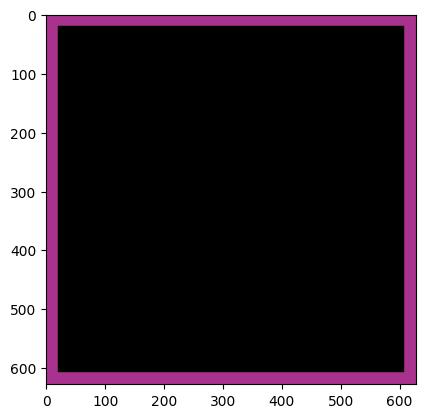

In [10]:
IMG_SCALE = 200
pix_width = int(membrane_width * IMG_SCALE)
pix_height = int(membrane_height * IMG_SCALE)
granularity = 1
TOLERANCE = 20

BOUNDARY_COLOR = [168, 50, 141]  # PINKISH

x = np.arange(0, pix_width, granularity)
y = np.arange(0, pix_height, granularity)
XY_R = np.zeros((pix_width, pix_height), dtype=int)
XY_G = np.zeros((pix_width, pix_height), dtype=int)
XY_B = np.zeros((pix_width, pix_height), dtype=int)

xv, yv = np.meshgrid(x, y, indexing='xy')

node_list = calculate_node_boundaries(TOLERANCE)

for i in range(len(x)):
    for j in range(len(y)):
        px = xv[j,i]
        py = yv[j,i]

        if is_first_order_node(px, py, node_list = node_list):
            XY_R[px][py] = BOUNDARY_COLOR[0]
            XY_G[px][py] = BOUNDARY_COLOR[1]
            XY_B[px][py] = BOUNDARY_COLOR[2]
        else:
            XY_R[px][py] = 0
            XY_G[px][py] = 0
            XY_B[px][py] = 0


image = np.dstack((XY_R, XY_G, XY_B))
plt.imshow(image)

### Notes
* All nodes drawn faster 8.7 secs
* Time was more effective by separating out functions
    * calculate_node_boundaries happens once to define a list of nodal boundaries, rather than each time
    * is_first_order_node adapted to evaluate single x,y pixel location to determine if it is on the node - event happens within the double for loop

Next:
* Node boundary calculation is hard coded
* I understood that nodes were to be made along the perimeter, and chose to build array's which were suitable
* Next attempt will be to generalize the calculation of nodes from an initial equation.

<hr>

## Grid Boundary | Oct 30, 2023

General solution

$$
u(x, y, t) = \sum_{n=1}^{\infty} \sum_{m=1}^{\infty} b_{nm} \sin(anx)\sin(m y)\cos(\sqrt{a^2n^2 + m^2}t)
$$

Wave Equation Solution where n = 2, m = 1:


$$
u(x, y, t) = \sin(2ax)\sin(y)\cos(\sqrt{4a^2 + 1}t)
$$

This is periodic with an angular frequency of 
$$
\omega_{21} = \sqrt{4a^2 + 1}
$$

Amplitude is Zero when
$$
2ax = c\pi
$$

$$
x = c\frac{\pi}{2a}
$$

$$
y = d\pi
$$

$$
where \hskip1em c, d \epsilon \Zeta
$$

#### Get c, d values:

* x can exist between 0 and pi/a
* y can exist between 0 and pi

https://docs.sympy.org/latest/tutorials/intro-tutorial/index.html

#### Creating the wave expression | Oct 31, 2023

In [13]:
from sympy import concrete # can be used for summations
from sympy import symbols
from sympy import cos, sin, sqrt, pi, atan
from sympy import solvers
import numpy as np
from matplotlib import pyplot as plt

In [14]:
membrane_height = pi
alpha = 1  # ratio of membrane height to width
membrane_width = membrane_height / alpha

In [21]:
def wave_expression(n, m, x, y, t, a):
    #expr = sin(a * n * x + m*y) * cos(sqrt((a**2 * n**2 + m**2) * t))
    expr = sin(a * n * x) * sin(m * y) * cos(sqrt((a**2 * n**2 + m**2) * t))
    return expr

#### Solving for the zeros in x and y

In [16]:
def get_xy_zeros(expr, x, y, n, m, a):

    x_zeros = solvers.solve(expr, x)
    end = x_zeros[-1]

    while end <= membrane_width:
        end += pi / (n * a)
        if end <= membrane_width:
            x_zeros.append(end)
        else:
            break
    
    y_zeros = solvers.solve(expr, y)
    end = y_zeros[-1]

    while end <= membrane_height:
        end += pi / m
        if end <= membrane_width:
            y_zeros.append(end)
        else:
            break
        
    return x_zeros, y_zeros

#### Notes:
* Zeros are correct, but do not account for integer multiples
* Once integer multiples exist, there must be a way to exclude those which are greater than the plate boundaries.

#### Need a new node calculation function for arbitrary number of x and y nodes.| Nov 1, 2023

In [17]:
IMG_SCALE = 200
TOLERANCE = 20

def calculate_node_boundaries(x_zeros, y_zeros, TOLERANCE, img_scale):
    granularity = 1

    x_bounds = []
    for i in range(0, len(x_zeros)):

        x_px = x_zeros[i] * img_scale
        if i == 0:  # LEFT EDGE BOUNDARY
            x_bounds.append([x_px, x_px + TOLERANCE])
        elif i == len(x_zeros) - 1:  # RIGHT EDGE BOUNDARY
            x_bounds.append([x_px - TOLERANCE, x_px])
        else:   # MID POINT
            x_bounds.append([x_px - TOLERANCE / 2, x_px + TOLERANCE / 2])

    y_bounds = []
    for i in range(0, len(y_zeros)):

        y_px = y_zeros[i] * img_scale
        if i == 0:  # LEFT EDGE BOUNDARY
            y_bounds.append([y_px, y_px + TOLERANCE])
        elif i == len(y_zeros) - 1:  # RIGHT EDGE BOUNDARY
            y_bounds.append([y_px - TOLERANCE, y_px])
        else:   # MID POINT
            y_bounds.append([y_px - TOLERANCE / 2, y_px + TOLERANCE / 2])

    return x_bounds, y_bounds

#### For reference on Node calculation

#### Needs method to take x,y boundary zeros and build lists of pixels which are nodes.

In [18]:
def node_calculator(x_bounds, y_bounds, pix_width, pix_height):

    node_list = []

    for i in range(0, len(x_bounds)):
        print(x_bounds[i][0], x_bounds[i][1])
        x_range = np.arange(int(x_bounds[i][0]), int(x_bounds[i][1]))
        y_range = np.arange(0, pix_height)
        node_list.append([y_range, x_range])

    for i in range(0, len(y_bounds)):
        y_range = np.arange(int(y_bounds[i][0]), int(y_bounds[i][1]))
        x_range = np.arange(0, pix_width)
        node_list.append([y_range, x_range])
    
    return node_list

In [19]:
def is_first_order_node(px, py, node_list):
    is_first_order_node = False

    for i in range(0, len(node_list)):

        if (px in node_list[i][0]) and (py in node_list[i][1]):
            is_first_order_node = True


    return is_first_order_node

#### Needs adapted to support node calculator

[0, pi/2, pi] [0, pi/4, pi/2, 3*pi/4, pi]
[[0, 20], [-10.0 + 100*pi, 10.0 + 100*pi], [-20 + 200*pi, 200*pi]] [[0, 20], [-10.0 + 50*pi, 10.0 + 50*pi], [-10.0 + 100*pi, 10.0 + 100*pi], [-10.0 + 150*pi, 10.0 + 150*pi], [-20 + 200*pi, 200*pi]]
0 20
-10.0 + 100*pi 10.0 + 100*pi
-20 + 200*pi 200*pi


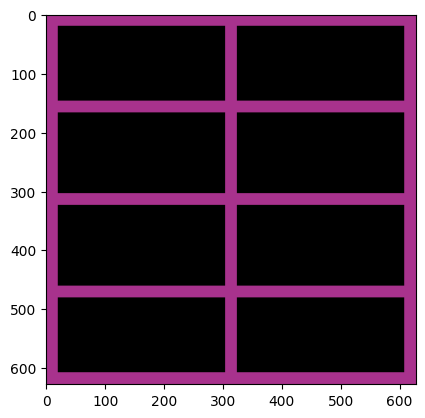

In [23]:
x, y, t = symbols('x y t')
a = 1
n = 2 # controls number of x divisions
m = 4 # controls number of y divisions

expr = wave_expression(n, m, x, y, t, a)
x_zeros, y_zeros = get_xy_zeros(expr, x, y, n, m, a)
print(x_zeros, y_zeros)

x_bounds, y_bounds = calculate_node_boundaries(x_zeros, y_zeros, TOLERANCE, IMG_SCALE)
print(x_bounds, y_bounds)

IMG_SCALE = 200
pix_width = int(membrane_width * IMG_SCALE)
pix_height = int(membrane_height * IMG_SCALE)
granularity = 1
TOLERANCE = 20

BOUNDARY_COLOR = [168, 50, 141]  # PINKISH

x = np.arange(0, pix_width, granularity)
y = np.arange(0, pix_height, granularity)
XY_R = np.zeros((pix_width, pix_height), dtype=int)
XY_G = np.zeros((pix_width, pix_height), dtype=int)
XY_B = np.zeros((pix_width, pix_height), dtype=int)

xv, yv = np.meshgrid(x, y, indexing='xy')

x_bounds, y_bounds = calculate_node_boundaries(x_zeros, y_zeros, TOLERANCE, IMG_SCALE)
node_list = node_calculator(x_bounds, y_bounds, pix_width, pix_height)

for i in range(len(x)):
    for j in range(len(y)):
        px = xv[j,i]
        py = yv[j,i]

        if is_first_order_node(px, py, node_list = node_list):
            XY_R[px][py] = BOUNDARY_COLOR[0]
            XY_G[px][py] = BOUNDARY_COLOR[1]
            XY_B[px][py] = BOUNDARY_COLOR[2]
        else:
            XY_R[px][py] = 0
            XY_G[px][py] = 0
            XY_B[px][py] = 0


image = np.dstack((XY_R, XY_G, XY_B))
plt.imshow(image)

# Notes | Nov 2, 2023
* Able to get left and top boundaries drawn
* need to figure the math on combinations which allow all boundaries to be drawn.

### Notes | Nov 3, 2023
* Looks like I've taken this example as far as it can go
* not very interesting, but a good proof of concept
* Need to investigate other initial displacement forms which can arrive at more interesting patterns
* It seems that all these forms are rectangular!
* may require solving zeros equations for systems of equations (relational in x and y rather than independent x, y)